In [1]:
import time
import fileconfig as cfg
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model(cfg.main['model_dir'])

W0918 19:21:23.276867 17364 deprecation_wrapper.py:119] From C:\Users\LENOVO\Anaconda3\envs\fhadli\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0918 19:21:23.332718 17364 deprecation_wrapper.py:119] From C:\Users\LENOVO\Anaconda3\envs\fhadli\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0918 19:21:23.345682 17364 deprecation_wrapper.py:119] From C:\Users\LENOVO\Anaconda3\envs\fhadli\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0918 19:21:24.199663 17364 deprecation_wrapper.py:119] From C:\Users\LENOVO\Anaconda3\envs\fhadli\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W091

In [3]:
def get_testing_data(data):
    step = cfg.train['timestep']
    data = data.tail(step)
  
    date = data['Date'].str[-2:]
    value = data['Value'].values
    result = list()
  
    for i, j in enumerate(date):
        result.append([j, value[i]])
    
    return result

In [4]:
def get_history_length(data):
    his_len = data.shape[0]
    return his_len

In [5]:
def prediction(X_input):
    X_input = X_input.reshape((1, len(X_input), len(X_input[0])))
    yhat = model.predict(X_input, verbose=0)
    return yhat

In [6]:
def predict_rest(X_test):
    n_previous_data = cfg.train['timestep'] * (-1)
    value_pred = prediction(array(X_test[n_previous_data:]))
    X_test.append([int(X_test[-1][0])+1, value_pred])
  
    return value_pred, X_test

In [7]:
def get_today_date(yesterday_date):
    string_date = time.strftime("%Y-%m-"+str(format((yesterday_date+1), '02d')))
    return string_date

In [10]:
def main():
    expense_hist = pd.read_csv(cfg.main['testing_data_dir'])
    expense_len = expense_hist.shape[0]  
    expend_df = expense_hist[expense_hist.Expense.notnull()]
    balance = input("Insert Your Balance (For simulation only):")
    
    for i in range(expend_df.shape[0]+1, expense_len+1): #expense_len+1
        print("Date: ",i)
        expend_df = expend_df[expend_df.Expense.notnull()]
        money = expend_df['Value'].values
        history_len = get_history_length(expend_df)
        unpredicted_len = expense_len - history_len
        today_date = get_today_date(history_len)

        expense = input("What's your expense? (Blank to STOP)")
        if not expense.strip():
            break
            
        value  = input("How much you spend? ")

        expend_df = expend_df.append(pd.Series([(history_len+1), today_date, expense, int(value)], index=expend_df.columns), ignore_index=True)
        money = np.append(money, [int(value)])
        predict = get_testing_data(expend_df)
        
        money_temp = 0
        for i in range(unpredicted_len):
            value_pred, predict = predict_rest(predict)
            money_temp += int(value_pred)
            money = np.append(money, [int(value_pred)])

        date = [i for i in range(1,32)]
        if(int(balance) < money_temp):
            print("Your Financial Condition is Unhealthy")
            plt.plot(date, money, 'r')
        else:
            print("Your Financial Condition is Healthy")
            plt.plot(date, money, 'g')
        plt.show()

Insert Your Balance (For simulation only):1000000
Date:  7
What's your expense? (Blank to STOP)Food
How much you spend? 50000
Your Financial Condition is Healthy


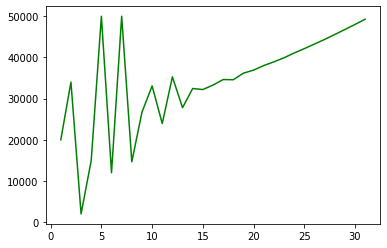

Date:  8
What's your expense? (Blank to STOP)Travel
How much you spend? 100000
Your Financial Condition is Unhealthy


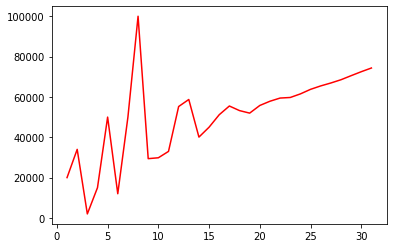

Date:  9
What's your expense? (Blank to STOP)


In [12]:
main()